In [1]:
#import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks
import pymannkendall as mk

In [2]:
f='/project/xprecip/merra2_ncfiles/precip_water/resampled/tcwv_6hrsum.nc'
DS_tcwv=xr.open_dataset(f)
DS_tcwv

<xarray.Dataset>
Dimensions:  (lat: 62, lon: 117, time: 62700)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-11-30T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5
Data variables:
    TQV      (time, lat, lon) float32 ...

In [3]:
precip_water=DS_tcwv['TQV']
precip_water

<xarray.DataArray 'TQV' (time: 62700, lat: 62, lon: 117)>
[454825800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-11-30T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5

In [4]:
winter_selected_tcwv=precip_water.isel(time=precip_water.time.dt.season.isin(['DJF']))
winter_selected_tcwv

<xarray.DataArray 'TQV' (time: 15400, lat: 62, lon: 117)>
[111711600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5

In [5]:
first5yrs=winter_selected_tcwv.sel(time=slice('1980-01-01','1985-12-31'))
first5yrs

<xarray.DataArray 'TQV' (time: 2168, lat: 62, lon: 117)>
[15726672 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1985-12-31T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5

In [6]:
values=first5yrs.groupby('time.month').quantile(0.50,dim='time')
values

<xarray.DataArray 'TQV' (month: 3, lat: 62, lon: 117)>
array([[[113.01382446, 111.96305084, 111.01610947, ..., 162.17321777,
         161.27009583, 160.66252899],
        [110.21138763, 110.36595917, 109.88576508, ..., 162.14600372,
         159.96164703, 160.08030701],
        [109.63286972, 108.5559082 , 108.94036865, ..., 162.06266022,
         159.27390289, 159.26770782],
        ...,
        [ 62.34088135,  47.55758286,  37.02186775, ...,  27.66406727,
          28.89941216,  29.13866234],
        [ 56.54249001,  45.13887787,  35.8481884 , ...,  25.01765633,
          26.94926071,  28.39792824],
        [ 53.32583237,  43.44097519,  36.350914  , ...,  24.34017467,
          25.95898342,  27.23264217]],

       [[107.51630783, 106.1986618 , 105.09673309, ..., 152.7901535 ,
         151.28875732, 150.41777039],
        [104.63500214, 103.77019882, 101.90655518, ..., 152.5182724 ,
         150.98577881, 149.27910614],
        [103.11880875, 102.77043915, 101.67145538, ..., 152.44664001,
         150.79587555, 149.39881897],
...
        [ 60.56760025,  46.83874512,  36.73345375, ...,  27.24505901,
          28.34616852,  28.95821762],
        [ 54.49067879,  43.42681313,  35.18611717, ...,  25.19670963,
          27.03439999,  27.960536  ],
        [ 50.28262138,  41.19370651,  35.14358521, ...,  24.98878574,
          26.4451046 ,  27.33084202]],

       [[116.99668884, 116.88743973, 116.62497711, ..., 180.24318695,
         180.75069427, 181.54164124],
        [114.5442543 , 113.56904602, 112.71579361, ..., 176.08164978,
         175.61971283, 177.40089417],
        [112.48117065, 110.8081665 , 109.56066895, ..., 171.83361816,
         172.03555298, 173.96253967],
        ...,
        [ 52.57319641,  40.36373711,  31.25634384, ...,  31.07269573,
          32.85359192,  33.44958115],
        [ 47.50655746,  38.06203842,  30.40790462, ...,  27.14920044,
          30.45772076,  31.90833378],
        [ 44.53897285,  36.17940903,  30.772645  , ...,  27.07473373,
          28.60212421,  30.82977009]]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
  * month     (month) int64 1 2 12

In [7]:
dec_ts=values.sel(month=12)
dec_ts

<xarray.DataArray 'TQV' (lat: 62, lon: 117)>
array([[116.99668884, 116.88743973, 116.62497711, ..., 180.24318695,
        180.75069427, 181.54164124],
       [114.5442543 , 113.56904602, 112.71579361, ..., 176.08164978,
        175.61971283, 177.40089417],
       [112.48117065, 110.8081665 , 109.56066895, ..., 171.83361816,
        172.03555298, 173.96253967],
       ...,
       [ 52.57319641,  40.36373711,  31.25634384, ...,  31.07269573,
         32.85359192,  33.44958115],
       [ 47.50655746,  38.06203842,  30.40790462, ...,  27.14920044,
         30.45772076,  31.90833378],
       [ 44.53897285,  36.17940903,  30.772645  , ...,  27.07473373,
         28.60212421,  30.82977009]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
    month     int64 12

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

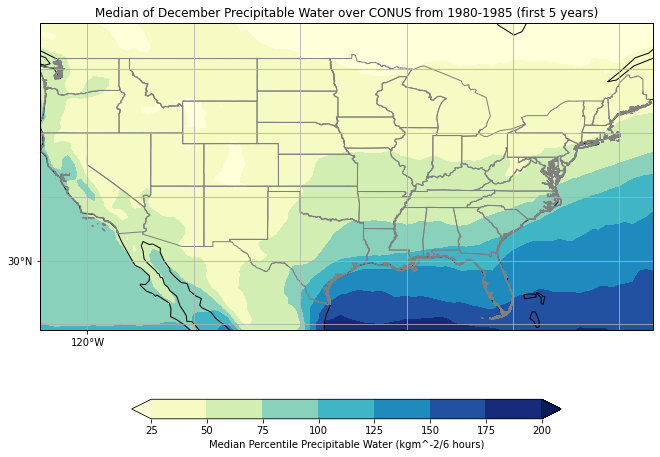

In [8]:
#clevs=np.arange(-1.0,1.0,10)
#max_val=1.0
#increment=0.25

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=dec_ts
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='YlGnBu',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Median Percentile Precipitable Water (kgm^-2/6 hours)')

# Add title
plt.title('Median of December Precipitable Water over CONUS from 1980-1985 (first 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec_earlyperiod_preecipwater_median.png')

In [9]:
jan_ts=values.sel(month=1)
jan_ts

<xarray.DataArray 'TQV' (lat: 62, lon: 117)>
array([[113.01382446, 111.96305084, 111.01610947, ..., 162.17321777,
        161.27009583, 160.66252899],
       [110.21138763, 110.36595917, 109.88576508, ..., 162.14600372,
        159.96164703, 160.08030701],
       [109.63286972, 108.5559082 , 108.94036865, ..., 162.06266022,
        159.27390289, 159.26770782],
       ...,
       [ 62.34088135,  47.55758286,  37.02186775, ...,  27.66406727,
         28.89941216,  29.13866234],
       [ 56.54249001,  45.13887787,  35.8481884 , ...,  25.01765633,
         26.94926071,  28.39792824],
       [ 53.32583237,  43.44097519,  36.350914  , ...,  24.34017467,
         25.95898342,  27.23264217]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
    month     int64 1

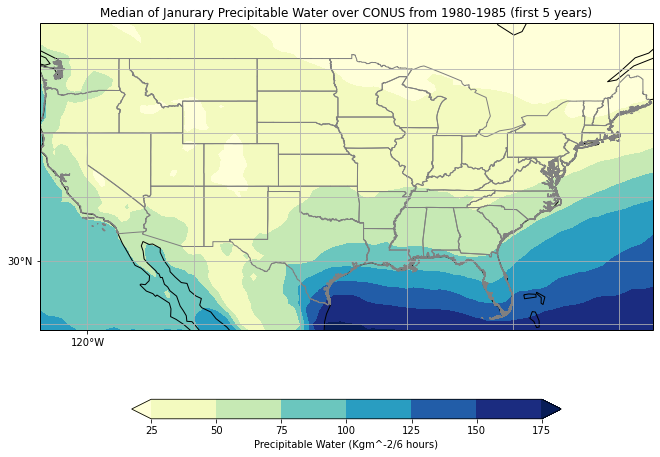

In [10]:

fig = plt.figure(figsize=(11,8.5))
#max_val=20
#increment=5

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=jan_ts
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='YlGnBu',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Precipitable Water (Kgm^-2/6 hours)')

# Add title
plt.title('Median of Janurary Precipitable Water over CONUS from 1980-1985 (first 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan_earlyperiod_precipwater_median.png')

In [11]:
feb_ts=values.sel(month=2)
feb_ts

<xarray.DataArray 'TQV' (lat: 62, lon: 117)>
array([[107.51630783, 106.1986618 , 105.09673309, ..., 152.7901535 ,
        151.28875732, 150.41777039],
       [104.63500214, 103.77019882, 101.90655518, ..., 152.5182724 ,
        150.98577881, 149.27910614],
       [103.11880875, 102.77043915, 101.67145538, ..., 152.44664001,
        150.79587555, 149.39881897],
       ...,
       [ 60.56760025,  46.83874512,  36.73345375, ...,  27.24505901,
         28.34616852,  28.95821762],
       [ 54.49067879,  43.42681313,  35.18611717, ...,  25.19670963,
         27.03439999,  27.960536  ],
       [ 50.28262138,  41.19370651,  35.14358521, ...,  24.98878574,
         26.4451046 ,  27.33084202]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
    month     int64 2

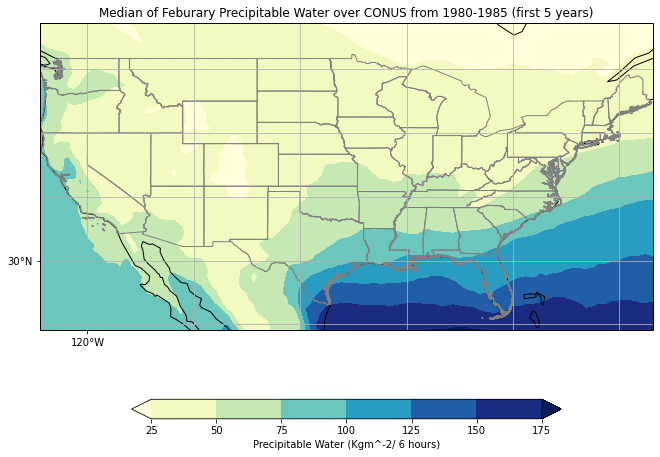

In [12]:
#max_val=25
#increment=5

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=feb_ts
data,lon=add_cyclic_point(data,coord=feb_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='YlGnBu',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Precipitable Water (Kgm^-2/ 6 hours)')

# Add title
plt.title('Median of Feburary Precipitable Water over CONUS from 1980-1985 (first 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb_earlyperiod_precipwater_median.png')

### Last 5 years

In [13]:
last5yrs=winter_selected_tcwv.sel(time=slice('2017-01-01','2022-12-31'))
last5yrs

<xarray.DataArray 'TQV' (time: 2040, lat: 62, lon: 117)>
[14798160 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat      (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 50.5 51.0 51.5 52.0 52.5

In [14]:
values_last=last5yrs.groupby('time.month').quantile(0.50,dim='time')
values_last

<xarray.DataArray 'TQV' (month: 3, lat: 62, lon: 117)>
array([[[125.57253647, 124.26364899, 124.3598175 , ..., 162.86444092,
         161.9772644 , 162.27735138],
        [121.93439102, 122.94575119, 121.79411316, ..., 164.15605927,
         162.2170105 , 161.11620331],
        [121.08472061, 119.1701622 , 119.83030319, ..., 164.92256165,
         163.76056671, 162.556427  ],
        ...,
        [ 66.22953415,  51.26916122,  40.11539078, ...,  29.41679001,
          30.59539318,  31.59613514],
        [ 59.90089989,  47.62867355,  38.25480652, ...,  26.23705959,
          28.90025806,  30.9818821 ],
        [ 54.80348396,  44.87716484,  38.20259666, ...,  26.70048714,
          28.12566376,  29.2709856 ]],

       [[116.11952972, 115.57126236, 114.37622833, ..., 157.77220154,
         158.77048492, 158.40865326],
        [113.0451355 , 111.13051605, 110.24903107, ..., 155.83479309,
         155.91931152, 156.85671234],
        [110.61659241, 107.87319565, 107.02872467, ..., 153.26927948,
         153.94476318, 154.91054535],
...
        [ 48.59247208,  37.58384514,  28.93959618, ...,  23.9338026 ,
          24.88007545,  25.91514206],
        [ 44.31259537,  35.47874451,  28.06842232, ...,  20.4990139 ,
          22.59936333,  23.48340511],
        [ 41.02740288,  33.30800056,  28.47335148, ...,  19.74303818,
          21.19208145,  22.15487099]],

       [[127.92158508, 126.8195343 , 126.50888062, ..., 172.59571075,
         172.40027618, 173.27136993],
        [123.76884842, 122.72170639, 122.39355469, ..., 172.46989441,
         171.80068207, 173.06912231],
        [122.20482635, 120.48796844, 118.95122528, ..., 173.86657715,
         173.10259247, 173.4010849 ],
        ...,
        [ 58.96307945,  45.76946068,  35.72330856, ...,  38.17975616,
          39.58512306,  40.88491058],
        [ 54.12444305,  43.57035065,  34.49656677, ...,  35.21318054,
          38.0218544 ,  40.0491848 ],
        [ 50.17055511,  41.30580139,  34.62316513, ...,  36.09003639,
          38.27997208,  39.61447716]]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
  * month     (month) int64 1 2 12

In [15]:
dec_ts=values_last.sel(month=12)
dec_ts

<xarray.DataArray 'TQV' (lat: 62, lon: 117)>
array([[127.92158508, 126.8195343 , 126.50888062, ..., 172.59571075,
        172.40027618, 173.27136993],
       [123.76884842, 122.72170639, 122.39355469, ..., 172.46989441,
        171.80068207, 173.06912231],
       [122.20482635, 120.48796844, 118.95122528, ..., 173.86657715,
        173.10259247, 173.4010849 ],
       ...,
       [ 58.96307945,  45.76946068,  35.72330856, ...,  38.17975616,
         39.58512306,  40.88491058],
       [ 54.12444305,  43.57035065,  34.49656677, ...,  35.21318054,
         38.0218544 ,  40.0491848 ],
       [ 50.17055511,  41.30580139,  34.62316513, ...,  36.09003639,
         38.27997208,  39.61447716]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
    month     int64 12

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)
/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as 

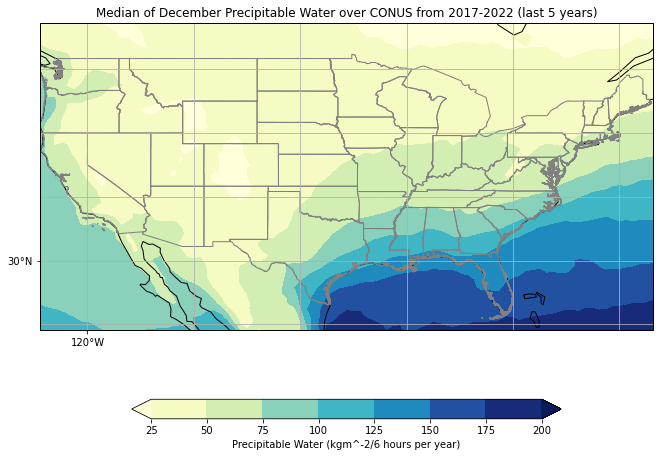

In [16]:
#clevs=np.arange(-1.0,1.0,10)
#max_val=25
#increment=5

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=dec_ts
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='YlGnBu',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Precipitable Water (kgm^-2/6 hours per year)')

# Add title
plt.title('Median of December Precipitable Water over CONUS from 2017-2022 (last 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec_laterperiod_precipwater_median.png')

In [17]:
jan_ts=values_last.sel(month=1)
jan_ts

<xarray.DataArray 'TQV' (lat: 62, lon: 117)>
array([[125.57253647, 124.26364899, 124.3598175 , ..., 162.86444092,
        161.9772644 , 162.27735138],
       [121.93439102, 122.94575119, 121.79411316, ..., 164.15605927,
        162.2170105 , 161.11620331],
       [121.08472061, 119.1701622 , 119.83030319, ..., 164.92256165,
        163.76056671, 162.556427  ],
       ...,
       [ 66.22953415,  51.26916122,  40.11539078, ...,  29.41679001,
         30.59539318,  31.59613514],
       [ 59.90089989,  47.62867355,  38.25480652, ...,  26.23705959,
         28.90025806,  30.9818821 ],
       [ 54.80348396,  44.87716484,  38.20259666, ...,  26.70048714,
         28.12566376,  29.2709856 ]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
    month     int64 1

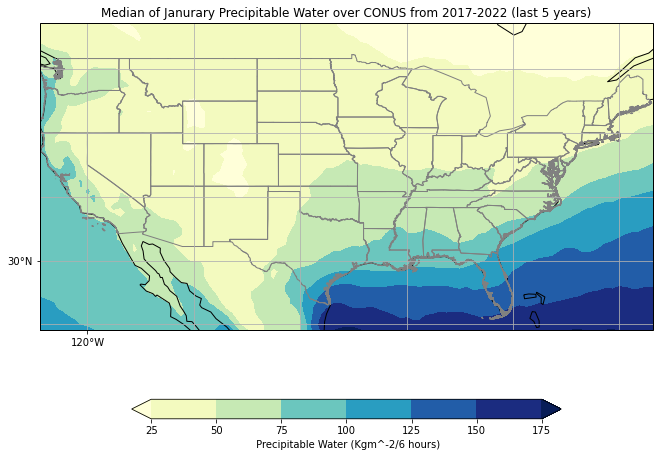

In [18]:

fig = plt.figure(figsize=(11,8.5))
#max_val=25
#increment=5

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=jan_ts
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='YlGnBu',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label=' Precipitable Water (Kgm^-2/6 hours)')

# Add title
plt.title('Median of Janurary Precipitable Water over CONUS from 2017-2022 (last 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan_laterperiod_precipwater_median.png')

In [19]:
feb_ts=values_last.sel(month=2)
feb_ts

<xarray.DataArray 'TQV' (lat: 62, lon: 117)>
array([[116.11952972, 115.57126236, 114.37622833, ..., 157.77220154,
        158.77048492, 158.40865326],
       [113.0451355 , 111.13051605, 110.24903107, ..., 155.83479309,
        155.91931152, 156.85671234],
       [110.61659241, 107.87319565, 107.02872467, ..., 153.26927948,
        153.94476318, 154.91054535],
       ...,
       [ 48.59247208,  37.58384514,  28.93959618, ...,  23.9338026 ,
         24.88007545,  25.91514206],
       [ 44.31259537,  35.47874451,  28.06842232, ...,  20.4990139 ,
         22.59936333,  23.48340511],
       [ 41.02740288,  33.30800056,  28.47335148, ...,  19.74303818,
         21.19208145,  22.15487099]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
    month     int64 2

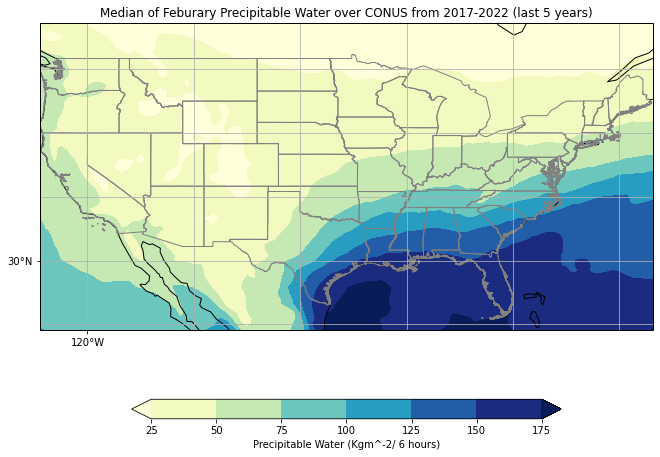

In [20]:
#max_val=25
#increment=5

#clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=feb_ts
data,lon=add_cyclic_point(data,coord=feb_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts['lat'],
            data,
            transform=ccrs.PlateCarree(),
            cmap='YlGnBu',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Precipitable Water (Kgm^-2/ 6 hours)')

# Add title
plt.title('Median of Feburary Precipitable Water over CONUS from 2017-2022 (last 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb_laterperiod_precipwater_median.png')

### Difference calcuulations

In [21]:
#I. December
diff_dec_50th=values_last.sel(month=12)-values.sel(month=12)
print(diff_dec_50th)

<xarray.DataArray 'TQV' (lat: 62, lon: 117)>
array([[10.92489624,  9.93209457,  9.8839035 , ..., -7.6474762 ,
        -8.35041809, -8.2702713 ],
       [ 9.22459412,  9.15266037,  9.67776108, ..., -3.61175537,
        -3.81903076, -4.33177185],
       [ 9.7236557 ,  9.67980194,  9.39055634, ...,  2.03295898,
         1.06703949, -0.56145477],
       ...,
       [ 6.38988304,  5.40572357,  4.46696472, ...,  7.10706043,
         6.73153114,  7.43532944],
       [ 6.61788559,  5.50831223,  4.08866215, ...,  8.0639801 ,
         7.56413364,  8.14085102],
       [ 5.63158226,  5.12639236,  3.85052013, ...,  9.01530266,
         9.67784786,  8.78470707]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
    month     int64 12


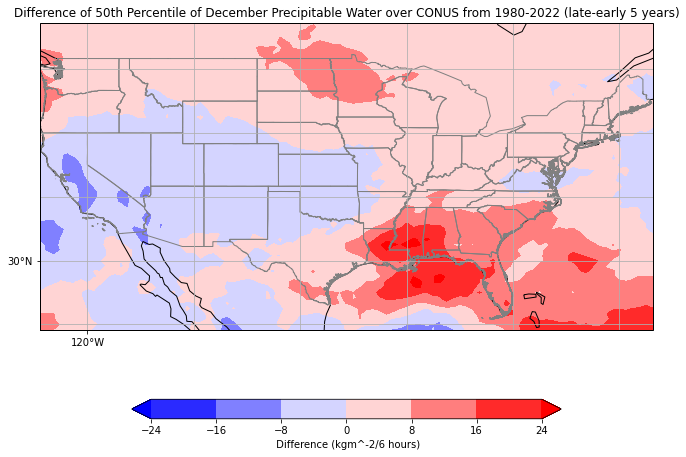

In [23]:
#clevs=np.arange(-1.0,1.0,10)
max_val=24
increment=8

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=diff_dec_50th
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label=' Difference (kgm^-2/6 hours)')

# Add title
plt.title('Difference of 50th Percentile of December Precipitable Water over CONUS from 1980-2022 (late-early 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec_diff_preecipwater_50th.png')

In [24]:
#II. January
diff_jan_50th=values_last.sel(month=1)-values.sel(month=1)
print(diff_jan_50th)

<xarray.DataArray 'TQV' (lat: 62, lon: 117)>
array([[12.55871201, 12.30059814, 13.34370804, ...,  0.69122314,
         0.70716858,  1.61482239],
       [11.72300339, 12.57979202, 11.90834808, ...,  2.01005554,
         2.25536346,  1.0358963 ],
       [11.45185089, 10.614254  , 10.88993454, ...,  2.85990143,
         4.48666382,  3.28871918],
       ...,
       [ 3.8886528 ,  3.71157837,  3.09352303, ...,  1.75272274,
         1.69598103,  2.4574728 ],
       [ 3.35840988,  2.48979568,  2.40661812, ...,  1.21940327,
         1.95099735,  2.58395386],
       [ 1.4776516 ,  1.43618965,  1.85168266, ...,  2.36031246,
         2.16668034,  2.03834343]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
    month     int64 1


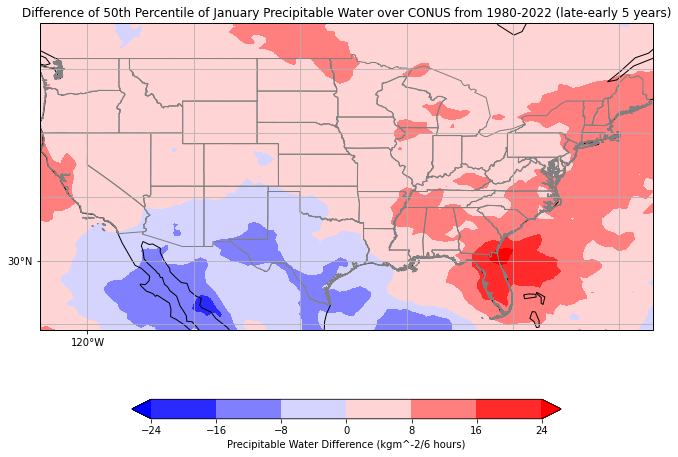

In [27]:
#clevs=np.arange(-1.0,1.0,10)
max_val=24
increment=8

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=diff_jan_50th
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Precipitable Water Difference (kgm^-2/6 hours)')

# Add title
plt.title('Difference of 50th Percentile of January Precipitable Water over CONUS from 1980-2022 (late-early 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan_diff_preecipwater_50th.png')

In [28]:
#III. Feburary
diff_feb_50th=values_last.sel(month=2)-values.sel(month=2)
print(diff_feb_50th)

<xarray.DataArray 'TQV' (lat: 62, lon: 117)>
array([[  8.60322189,   9.37260056,   9.27949524, ...,   4.98204803,
          7.4817276 ,   7.99088287],
       [  8.41013336,   7.36031723,   8.34247589, ...,   3.31652069,
          4.93353271,   7.5776062 ],
       [  7.49778366,   5.1027565 ,   5.35726929, ...,   0.82263947,
          3.14888763,   5.51172638],
       ...,
       [-11.97512817,  -9.25489998,  -7.79385757, ...,  -3.31125641,
         -3.46609306,  -3.04307556],
       [-10.17808342,  -7.94806862,  -7.11769485, ...,  -4.69769573,
         -4.43503666,  -4.47713089],
       [ -9.25521851,  -7.88570595,  -6.67023373, ...,  -5.24574757,
         -5.25302315,  -5.17597103]])
Coordinates:
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -56.25 -55.62 -55.0
  * lat       (lat) float64 22.0 22.5 23.0 23.5 24.0 ... 51.0 51.5 52.0 52.5
    quantile  float64 0.5
    month     int64 2


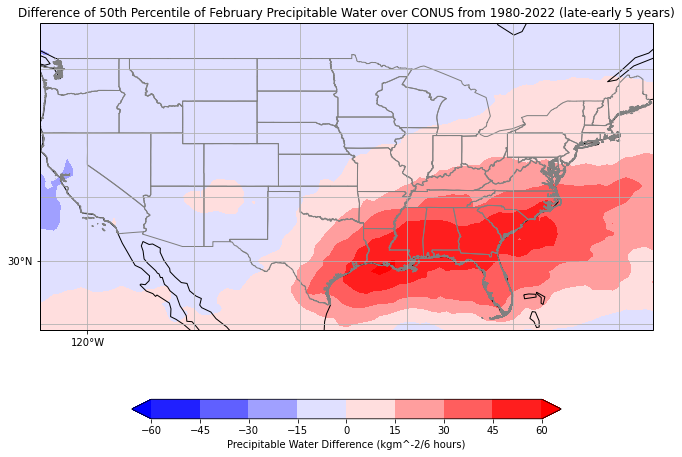

In [30]:
#clevs=np.arange(-1.0,1.0,10)
max_val=60
increment=15

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=diff_feb_50th
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Precipitable Water Difference (kgm^-2/6 hours)')

# Add title
plt.title('Difference of 50th Percentile of February Precipitable Water over CONUS from 1980-2022 (late-early 5 years)')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb_diff_preecipwater_50th.png')